# GOSTnets Market Access Examples: fetch OSM POIs


### Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os, inspect, logging, importlib

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.ops import split, unary_union
from shapely.geometry import box, Point

import matplotlib.pyplot as plt

In [3]:
# Get reference to GOSTNets
sys.path.append(r'../../../GOSTnets')
import GOSTnets as gn

In [5]:
from GOSTnets.fetch_pois import *

### check to make sure you are usng osmnx version 1.0.1 or above

In [6]:
import osmnx as ox 
ox.__version__

'1.0.1'

In [7]:
# import extent
city_extent = gpd.read_file("admin/Buffalo_City.shp")

In [8]:
# make sure crs is 4326
print(city_extent.crs)

epsg:4326


In [9]:
extent = box(*city_extent.total_bounds)

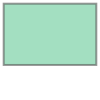

In [10]:
extent

## We will extract OSM POIs
There is a new way to create tags from before. We are following the same way OSMNX now does it with their geometry module. The GOSTnets fetch_pois module uses it as a dependency.

In [12]:
tags = {'amenity':['school', 'kindergarten','university', 'college']}

In [13]:
# create the OsmObject
schools_query = OsmObject('education', extent, tags)      

In [14]:
schools_query

### The advantage of using the GenerateOSMPOIs method is that it fetches nodes, ways, and relations

In [16]:
schools_query.GenerateOSMPOIs()

../../../GOSTnets\GOSTnets\fetch_pois.py:79: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygons['geometry'] = polygons.centroid
C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\geopandas\geoseries.py:158: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)


,unique_id,osmid,element_type,amenity,name,geometry,wikidata,designation,source,barrier,...,wikipedia,building,isced,addr:postcode,addr:street,email,opening_hours,phone,website,religion
0,node/621169044,621169044,node,school,Port Rex Technical High,POINT (27.91170 -32.98514),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node/621169045,621169045,node,school,Hudson Park High,POINT (27.91586 -32.98572),Q5928799,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node/621169047,621169047,node,school,Hudson Park Primary,POINT (27.91603 -32.98316),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node/1717717357,1717717357,node,college,East London FET College,POINT (27.89951 -32.99601),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node/1828180115,1828180115,node,school,St. Johns Road Primary,POINT (27.89632 -33.00945),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,way/392838382,392838382,way,university,University of Fort Hare,POINT (27.42815 -32.86145),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,way/865934585,865934585,way,school,NaN,POINT (27.44307 -32.88653),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,way/865934586,865934586,way,school,NaN,POINT (27.44323 -32.88988),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,way/865934604,865934604,way,school,NaN,POINT (27.38356 -32.89457),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
schools_query.RemoveDupes(0.0005)

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
../../../GOSTnets\GOSTnets\fetch_pois.py:95: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['buffer'] = gdf['geometry'].buffer(buf_width)


,addr:postcode,addr:street,amenity,barrier,buffer,building,created_by,designation,element_type,email,...,nodes,opening_hours,osmid,phone,religion,source,unique_id,website,wikidata,wikipedia
0,NaN,NaN,school,NaN,"POLYGON ((27.9121977 -32.9851427, 27.912195292...",NaN,NaN,NaN,node,NaN,...,NaN,NaN,6.211690e+08,NaN,NaN,NaN,node/621169044,NaN,NaN,NaN
1,NaN,NaN,school,NaN,"POLYGON ((27.9163605 -32.9857187, 27.916358092...",NaN,NaN,NaN,node,NaN,...,NaN,NaN,6.211690e+08,NaN,NaN,NaN,node/621169045,NaN,Q5928799,NaN
2,NaN,NaN,school,NaN,"POLYGON ((27.9165321 -32.9831628, 27.916529692...",NaN,NaN,NaN,node,NaN,...,NaN,NaN,6.211690e+08,NaN,NaN,NaN,node/621169047,NaN,NaN,NaN
3,NaN,NaN,college,NaN,"POLYGON ((27.9000102 -32.9960097, 27.900007792...",NaN,NaN,NaN,node,NaN,...,NaN,NaN,1.717717e+09,NaN,NaN,NaN,node/1717717357,NaN,NaN,NaN
4,NaN,NaN,school,NaN,"POLYGON ((27.8968207 -33.0094526, 27.896818292...",NaN,NaN,NaN,node,NaN,...,NaN,NaN,1.828180e+09,NaN,NaN,NaN,node/1828180115,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,NaN,university,NaN,POLYGON ((27.42865472444661 -32.86144644612616...,NaN,NaN,NaN,way,NaN,...,"[3960334801, 3960334802, 3960334803, 396033480...",NaN,3.928384e+08,NaN,NaN,NaN,way/392838382,NaN,NaN,NaN
116,NaN,NaN,school,NaN,POLYGON ((27.44356719384164 -32.88652631501944...,NaN,NaN,NaN,way,NaN,...,"[8071307802, 8071307801, 8071307800, 807130779...",NaN,8.659346e+08,NaN,NaN,NaN,way/865934585,NaN,NaN,NaN
117,NaN,NaN,school,NaN,POLYGON ((27.44373261532089 -32.88988057880312...,NaN,NaN,NaN,way,NaN,...,"[8071307815, 8071307814, 8071307813, 807130781...",NaN,8.659346e+08,NaN,NaN,NaN,way/865934586,NaN,NaN,NaN
118,NaN,NaN,school,NaN,"POLYGON ((27.3840606891516 -32.89456859897195,...",NaN,NaN,NaN,way,NaN,...,"[8071314108, 8071314107, 8071314106, 807131410...",NaN,8.659346e+08,NaN,NaN,NaN,way/865934604,NaN,NaN,NaN


In [18]:
# warning: might not want to include the 'osmid' field because it may contain lists
school_destinations = schools_query.df[['amenity','geometry','name']]

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
school_destinations[:3]

,amenity,geometry,name
0,school,POINT (27.9116977 -32.9851427),Port Rex Technical High
1,school,POINT (27.9158605 -32.9857187),Hudson Park High
2,school,POINT (27.9160321 -32.9831628),Hudson Park Primary


### save the facilities as a shapefile

In [21]:
# if not os.path.exists(outputFolder + '/osm_infrastructure/OSM_schools.shp'):

# convert to GeoDataFrame
school_destinations_gpd = gpd.GeoDataFrame(school_destinations, crs = "epsg:4326", geometry = 'geometry')
#school_destinations_gpd.to_file(outputFolder + '/osm_schools.shp')
# or you can write to a CSV
school_destinations_gpd.to_csv('osm_schools.csv')